In [568]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 


In [569]:
train_set = pd.read_csv('train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [570]:
test_set = pd.read_csv('test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [571]:
print(train_set.shape)
train_set.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [572]:
print(test_set.shape)
test_set.isnull().sum()

(418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [573]:
print('Train_set: ', train_set.dtypes)
print('\nTest_set: ', test_set.dtypes)

Train_set:  PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Test_set:  PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Combine train_set and test_set and fill missing values

In [574]:
all_set = pd.concat([train_set, test_set])
all_set.head()

C:\Users\donny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [575]:
all_set.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Fill with most frequent one for Embarked

In [576]:
print(all_set.Embarked.value_counts())
keys = all_set.Embarked.value_counts().keys()
values = list(all_set.Embarked.value_counts())
print(keys)
print(values)

S    914
C    270
Q    123
Name: Embarked, dtype: int64
Index(['S', 'C', 'Q'], dtype='object')
[914, 270, 123]


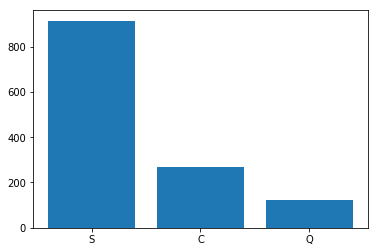

In [577]:
fig, ax = plt.subplots()
ax.bar(keys, values)
plt.show()

In [578]:
all_set['Embarked'].fillna('S', inplace=True)
assert not all_set.Embarked.isnull().any()

Add a feature Title from Name

In [579]:
tmp = all_set['Name'].str.split('.', n=1, expand=True)
titles = tmp[0].str.split(',', expand=True)
all_set['Title'] = titles[1].str.strip()
true_names = all_set['Name']
all_set.drop('Name', axis=1, inplace=True)

In [580]:
all_set.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Lady              1
Don               1
Mme               1
Sir               1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [581]:
conditions = [(all_set['Title'] == 'Mr'),
              (all_set['Title'] == 'Miss'),
              (all_set['Title'] == 'Mrs'),
              (all_set['Title'] == 'Master')]
choices = ['Mr', 'Miss', 'Mrs', 'Master']
all_set['Title'] = np.select(conditions, choices, default='Misc')


In [582]:
all_set.Title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64

In [583]:
title_surv = all_set[(all_set['Survived']==1) & (all_set['Survived'].notnull())].groupby('Title')['Survived'].count()
title_total = all_set[(all_set['Survived'].notnull())].Title.value_counts()
print(title_surv)
print(title_total)

Title
Master     23
Misc       12
Miss      127
Mr         81
Mrs        99
Name: Survived, dtype: int64
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [584]:
# survival ratio by Title
x = ['Mr','Miss','Mrs','Master','Misc']
y = [round(title_surv['Mr']/title_total['Mr'] *100,1),
     round(title_surv['Miss']/title_total['Miss'] *100,1),
     round(title_surv['Mrs']/title_total['Mrs'] *100,1),
     round(title_surv['Master']/title_total['Master'] *100,1),
     round(title_surv['Misc']/title_total['Misc'] *100, 1)]



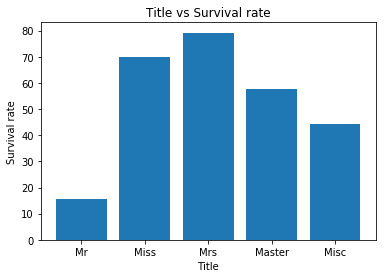

In [585]:
fig, ax = plt.subplots()
ax.bar(x, y)
plt.xlabel('Title')
plt.ylabel('Survival rate')
plt.title('Title vs Survival rate')
plt.show()

In [586]:
all_set.Title = all_set.Title.map({'Mrs':5, 'Miss':4, 'Master':3, 'Misc':2, 'Mr':1}).astype('int')

In [587]:
all_set.Title.value_counts().sum()

1309

Fill missing values with a value between -/+ 1std

In [588]:
import random as rd
each_mean = np.arange(6)
each_std = np.arange(6)

# mean calculation
for i in range(1,6):
    print(i)
    age_each = all_set[all_set['Title'] == i].Age.copy()
    age_each_mean = age_each[age_each.notnull()].describe()['mean']
    age_each_std = age_each[age_each.notnull()].describe()['std']
    
    for j, val in age_each.isnull().iteritems():
        if val == True:
            all_set.loc[j, 'Age'] = rd.uniform(age_each_mean - age_each_std, age_each_mean + age_each_std+1)
            
assert not all_set.Age.isnull().any()

1
2
3
4
5


In [589]:
sex_surv = all_set[all_set['Survived'].notnull()][['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived')

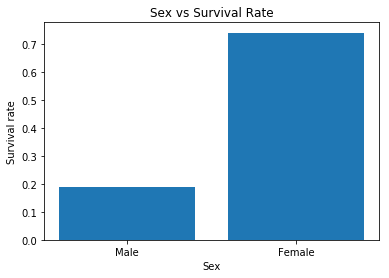

In [590]:
x = ['Male', 'Female']
y = list(sex_surv.Survived)

fig, ax = plt.subplots()
ax.bar(x,y)
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.title('Sex vs Survival Rate')
plt.show()

Drop feature Cabin due to too many null values

In [591]:
all_set.drop('Cabin', axis=1, inplace=True)

In [592]:
all_set.dtypes

Age            float64
Embarked        object
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Title            int32
dtype: object

In [593]:
all_set.isnull().sum()

Age              0
Embarked         0
Fare             1
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
dtype: int64

In [594]:
# Fill missing value in feature Fare with mean of the fare of those with same Embarked and Pclass
all_set[all_set['Fare'].isnull()] # Embarked: S, Pclass: 3
fare_mean = all_set[(all_set['Embarked']=='S') & (all_set['Pclass']==3)].describe()['Fare']['mean']

all_set.Fare.fillna(fare_mean, inplace=True)
 

In [595]:
all_set.isnull().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
dtype: int64

In [596]:
all_set.dtypes

Age            float64
Embarked        object
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
Title            int32
dtype: object

Change features with object type to numerical type

In [597]:
# Change Sex to numerical data
all_set.Sex = all_set.Sex.map({'female':0, 'male':1}).astype('int')

In [598]:
all_set.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

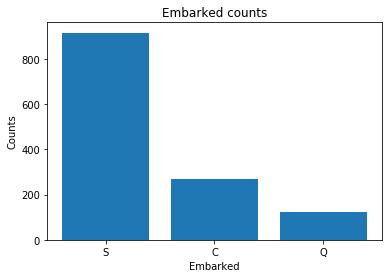

In [599]:
x = ['S','C','Q']
y = all_set.Embarked.value_counts()

fig, ax = plt.subplots()
ax.bar(x, y)
plt.xlabel('Embarked')
plt.ylabel('Counts')
plt.title('Embarked counts')
plt.show()

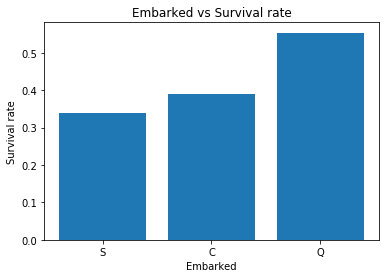

In [600]:
embark_surv = all_set[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Survived')

y = embark_surv['Survived']
fig, ax = plt.subplots()
ax.bar(x,y)
plt.xlabel('Embarked')
plt.ylabel('Survival rate')
plt.title('Embarked vs Survival rate')
plt.show()

In [601]:
# Change to ordinal data
all_set.Embarked = all_set.Embarked.map({'Q':3, 'C':2, 'S':1}).astype('int')

In [602]:
all_set.isnull().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
dtype: int64

Add Feature 'Alone'

In [603]:
all_set['Alone'] = all_set['Parch'] + all_set['SibSp']
all_set['Alone'] = np.select([all_set['Alone']==0], [1], default = 0)
all_set.drop(['Parch','SibSp'], axis=1, inplace=True)
all_set.Alone.value_counts()

1    790
0    519
Name: Alone, dtype: int64

In [604]:
all_set.drop('Ticket', axis=1, inplace=True)

In [605]:
all_set.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Alone
0,22.0,1,7.2500,1,3,1,0.0,1,0
1,38.0,2,71.2833,2,1,0,1.0,5,0
2,26.0,1,7.9250,3,3,0,1.0,4,1
3,35.0,1,53.1000,4,1,0,1.0,5,0
4,35.0,1,8.0500,5,3,1,0.0,1,1


In [606]:
train = all_set.iloc[:len(train_set),:]
test = all_set.iloc[len(train_set):,:]


In [607]:
print("Train set:", train.shape, "\n Test set:", test.shape)

Train set: (891, 9) 
 Test set: (418, 9)


In [608]:
train.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Alone
0,22.0,1,7.2500,1,3,1,0.0,1,0
1,38.0,2,71.2833,2,1,0,1.0,5,0
2,26.0,1,7.9250,3,3,0,1.0,4,1
3,35.0,1,53.1000,4,1,0,1.0,5,0
4,35.0,1,8.0500,5,3,1,0.0,1,1


In [609]:
test.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Alone
0,34.5,3,7.8292,892,3,1,NaN,1,1
1,47.0,1,7.0000,893,3,0,NaN,5,0
2,62.0,3,9.6875,894,2,1,NaN,1,1
3,27.0,1,8.6625,895,3,1,NaN,1,1
4,22.0,1,12.2875,896,3,0,NaN,5,0


In [610]:
y_train = train.Survived
test_id = test.PassengerId
x_train = train.drop(['PassengerId', 'Survived'], axis=1)
x_test = test.drop(['PassengerId', 'Survived'], axis=1)

In [611]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_df = sc_x.fit_transform(x_train)
x_test_df = sc_x.transform(x_test)

C:\Users\donny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\donny\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\donny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [612]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [613]:
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x_train_df, y_train, test_size = 0.2, random_state=0)

In [614]:
# SVM model
svc = SVC().fit(x_train_set, y_train_set)
svc_pred = svc.predict(x_test_set)

# model accuracy for x_test_set
acc_svc = svc.score(x_test_set, y_test_set)
print(acc_svc)

0.8268156424581006


C:\Users\donny\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


at  1  :  0.43582580703557733
at  2  :  0.4484610556511615
at  3  :  0.40938706057120133
at  4  :  0.40938706057120133
at  5  :  0.38837866680189276
at  6  :  0.38837866680189276
at  7  :  0.38111861230861543


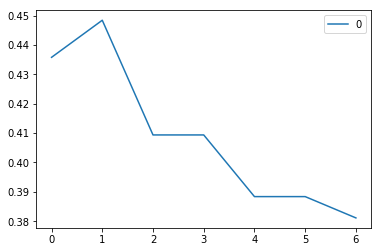

In [615]:
# Knn 
# find the best number of k
rmse = []
for k in range(1,8):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train_set, y_train_set)
    knn_pred = knn_classifier.predict(x_test_set)
    error = sqrt(mean_squared_error(y_test_set, knn_pred))
    rmse.append(error)
    print('at ', k, ' : ', error)
    
graph = pd.DataFrame(rmse)
graph.plot()

In [616]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train_set, y_train_set)
knn_pred = knn.predict(x_test_set)

# accuracy of model
acc_knn = knn.score(x_test_set, y_test_set)
print(acc_knn)

0.8491620111731844


In [617]:
# Decision Tree
dec = DecisionTreeClassifier(random_state=0).fit(x_train_set, y_train_set)
dec_pred = dec.predict(x_test_set)

# accuracy of model
acc_dec = dec.score(x_test_set, y_test_set)
print(acc_dec)


0.8044692737430168


In [618]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100).fit(x_train_set, y_train_set)
rf_pred = rf.predict(x_test_set)

# accuracy of model
acc_rf = rf.score(x_test_set, y_test_set)
print(acc_rf)

0.8435754189944135


In [619]:
columns = ['SVM','KNN','Decision Tree','Random Forest']
acc = [acc_svc, acc_knn, acc_dec, acc_rf]
acc_df = pd.DataFrame([columns, values])
print(acc_df)

     0    1              2              3
0  SVM  KNN  Decision Tree  Random Forest
1  914  270            123           None


In [620]:
# Use Random forest
rff = RandomForestClassifier(n_estimators=100).fit(x_train_df, y_train)
y_pred = rff.predict(x_test_df)
print(y_pred)


[0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.

In [624]:
submission = pd.DataFrame({
                           'PassengerId': test_id,
                           'Survived': y_pred.astype('int')
                           })
submission.to_csv('submission.csv', index=False)


PassengerId    int64
Survived       int32
dtype: object